In [40]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [22]:
nope = pd.read_csv('Data/Production_Data.csv')

In [35]:
nope['Date'] = ''
nope['Time'] = ''

for index, row in nope.iterrows():
    nope.at[index, 'Date'] = nope['Human Time'].values[index].split(' ')[0]
    nope.at[index, 'Time'] = nope['Human Time'].values[index].split(' ')[1]
nope.head()

,Unnamed: 0,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol,Date,Day,Time
0,0,2020-01-02 09:35:00,21109.0665,-8794.5394,3307936.0,37.227223,323.68,SPY,2020-01-02,,09:35:00
1,1,2020-01-02 09:40:00,39886.0152,-18354.4376,3934902.0,54.719476,323.85,SPY,2020-01-02,,09:40:00
2,2,2020-01-02 09:45:00,54701.5718,-27098.0969,4618390.0,59.768610,323.86,SPY,2020-01-02,,09:45:00
3,3,2020-01-02 09:50:00,61830.7123,-37489.7230,5383297.0,45.215765,323.75,SPY,2020-01-02,,09:50:00
4,4,2020-01-02 09:55:00,69925.0235,-48245.7942,5903828.0,36.720632,323.62,SPY,2020-01-02,,09:55:00


In [36]:
nope['Day'] = ''

for index, row in nope.iterrows():
    year, month, day = nope['Date'].values[index].split('-')
    nope.at[index, 'Day'] = datetime.date(int(year), int(month), int(day)).strftime("%A")
    
nope.head()

,Unnamed: 0,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol,Date,Day,Time
0,0,2020-01-02 09:35:00,21109.0665,-8794.5394,3307936.0,37.227223,323.68,SPY,2020-01-02,Thursday,09:35:00
1,1,2020-01-02 09:40:00,39886.0152,-18354.4376,3934902.0,54.719476,323.85,SPY,2020-01-02,Thursday,09:40:00
2,2,2020-01-02 09:45:00,54701.5718,-27098.0969,4618390.0,59.768610,323.86,SPY,2020-01-02,Thursday,09:45:00
3,3,2020-01-02 09:50:00,61830.7123,-37489.7230,5383297.0,45.215765,323.75,SPY,2020-01-02,Thursday,09:50:00
4,4,2020-01-02 09:55:00,69925.0235,-48245.7942,5903828.0,36.720632,323.62,SPY,2020-01-02,Thursday,09:55:00


In [62]:
nope['Test'] = ''
for index, row in nope.iterrows():
    if nope['Day'].values[index] == 'Friday':
        nope.at[index, 'Test'] = '1'

nope_temp = nope[nope['Test'] == '1']
mean_daily_nope = nope_temp.groupby(['Time']).mean()
mean_daily_nope

,Unnamed: 0,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price
Time,,,,,,
09:30:00,25772.833333,1.145003e+05,-7.834017e+04,2.224459e+06,3.141967,382.243333
09:31:00,30339.000000,5.010626e+05,-5.194817e+05,2.860778e+06,2.362020,384.655000
09:32:00,30340.000000,8.965695e+05,-1.001282e+06,3.221678e+06,0.037789,384.653636
09:33:00,30341.000000,1.242574e+06,-1.452978e+06,3.673340e+06,-2.678322,384.578182
09:34:00,30887.900000,1.650761e+06,-1.794644e+06,4.110429e+06,1.148466,384.817000
...,...,...,...,...,...,...
15:59:00,30746.090909,7.111063e+07,-7.005629e+07,7.683502e+07,14.265016,384.639091
16:00:00,9430.739130,6.887656e+05,-7.457568e+05,9.052871e+07,2.718793,317.468478
16:05:00,9431.739130,7.035065e+05,-7.559130e+05,9.296175e+07,2.642588,317.467826


In [63]:
mean_daily_nope['nope_sma5'] = mean_daily_nope['NOPE'].rolling(5,min_periods=1).mean()
mean_daily_nope['std5'] = mean_daily_nope['NOPE'].rolling(5,min_periods=1).std()
mean_daily_nope['nope_ema'] = mean_daily_nope['NOPE'].ewm(alpha =0.1, adjust = False).mean()

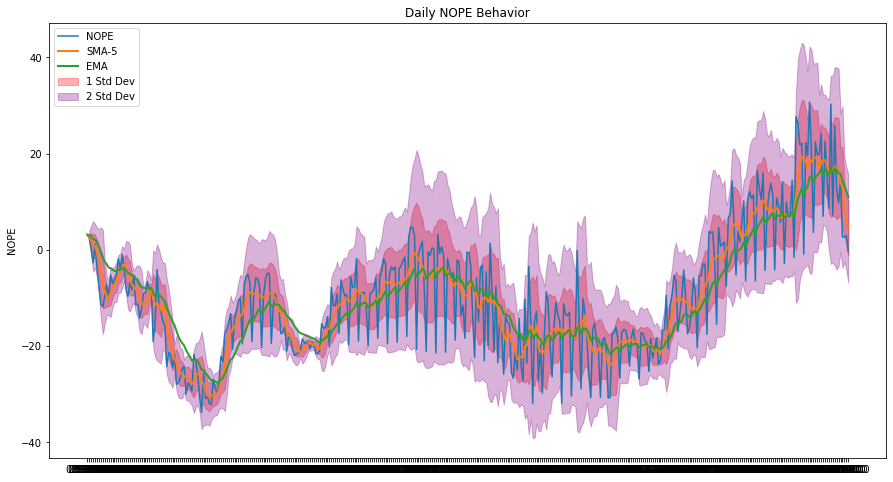

In [66]:
ax = plt.figure(figsize=(15,8))
x = mean_daily_nope.index
plt.plot(x, mean_daily_nope['NOPE'])
plt.plot(x, mean_daily_nope['nope_sma5'], lw = 2)
plt.plot(x, mean_daily_nope['nope_ema'], lw = 2)

over = mean_daily_nope['nope_sma5'] + mean_daily_nope['std5']
under = mean_daily_nope['nope_sma5'] - mean_daily_nope['std5']

plt.fill_between(x, under, over, color = 'red', alpha= 0.3)
plt.fill_between(x, mean_daily_nope['nope_sma5']-mean_daily_nope['std5']*2, mean_daily_nope['nope_sma5']+mean_daily_nope['std5']*2, color = 'purple', alpha= 0.3)

plt.title('Daily NOPE Behavior')
plt.ylabel('NOPE')
plt.legend(['NOPE','SMA-5','EMA','1 Std Dev', '2 Std Dev'])